# ANOVA Practice 🌺

* Dataset can be downloaded from https://www.kaggle.com/sudalairajkumar/covid19-in-india/data
  * This is the dataset of Indian corona virus cases before their cases skyrocketed

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

from statsmodels.stats.anova import anova_lm

In [28]:
df =pd.read_csv('Big_Mart_Train_preprocessed.csv')
print(df.shape)

df.head()

(8523, 11)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,18,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,18,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,19,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,30,0,2,1,994.7052


## One Way ANOVA

* H0: Item_Outlet_Sales has no difference among Outlet_Types
* H1: Item_Outlet_Sales has a significant difference among Outlet_Types

In [29]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

### ANOVA Assumptions

#### Randomness
* Ramdomly choose data from each factor

In [30]:
selected_df = df[['Outlet_Type', 'Item_Outlet_Sales']].groupby('Outlet_Type')\
                                                      .apply(lambda x: x.sample(888, replace=False))\
                                                      .reset_index(drop=True)
print(selected_df['Outlet_Type'].value_counts())

selected_df.head()

3    888
1    888
2    888
0    888
Name: Outlet_Type, dtype: int64


,Outlet_Type,Item_Outlet_Sales
0,0,229.7010
1,0,159.7920
2,0,344.8844
3,0,338.2264
4,0,424.7804


### Normality

* The data in each factor level should be normal distribution

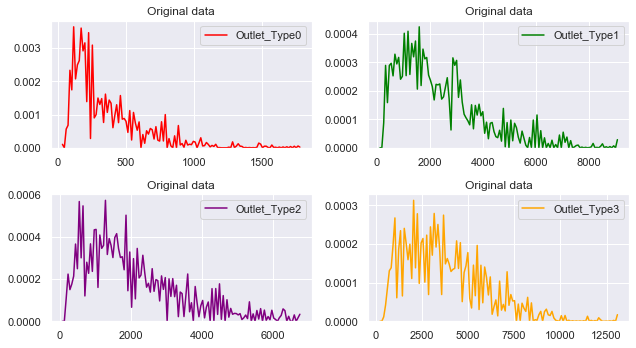

In [65]:
fig=plt.figure(figsize=(9,5))
n_rows = 2
n_cols = 2
color_lst = ['red', 'green', 'purple', 'orange']

for i in selected_df['Outlet_Type'].unique():
    ax=fig.add_subplot(n_rows,n_cols,i+1) 
    sns.kdeplot(selected_df.loc[selected_df['Outlet_Type']==i]['Item_Outlet_Sales'], 
                bw=0.2, label="Outlet_Type"+str(i), color=color_lst[i])
    plt.title('Original data')
fig.tight_layout()
plt.show()

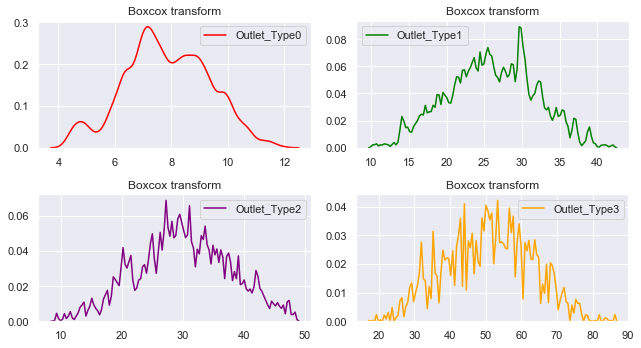

In [66]:
from sklearn.preprocessing import power_transform

fig=plt.figure(figsize=(9,5))
n_rows = 2
n_cols = 2
color_lst = ['red', 'green', 'purple', 'orange']

for i in selected_df['Outlet_Type'].unique():
    ax=fig.add_subplot(n_rows,n_cols,i+1) 
    sns.kdeplot(stats.boxcox(selected_df.loc[selected_df['Outlet_Type']==i]['Item_Outlet_Sales'].values)[0], 
                bw=0.2, label="Outlet_Type"+str(i), color=color_lst[i])
    plt.title('Boxcox transform')
fig.tight_layout()
plt.show()

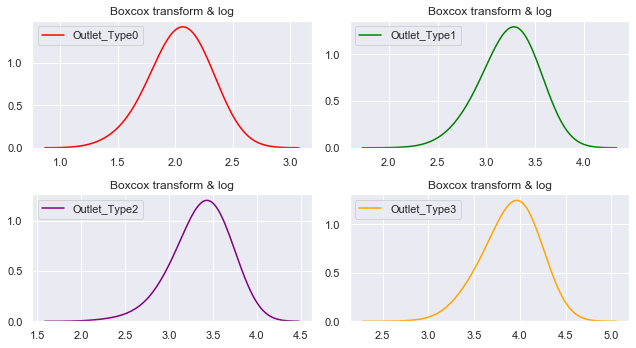

In [75]:
from sklearn.preprocessing import power_transform

fig=plt.figure(figsize=(9,5))
n_rows = 2
n_cols = 2
color_lst = ['red', 'green', 'purple', 'orange']

for i in selected_df['Outlet_Type'].unique():
    ax=fig.add_subplot(n_rows,n_cols,i+1) 
    sns.kdeplot(np.log(stats.boxcox(selected_df.loc[selected_df['Outlet_Type']==i]['Item_Outlet_Sales'].values)[0]), 
                bw=0.2, label="Outlet_Type"+str(i), color=color_lst[i])
    plt.title('Boxcox transform & log')
fig.tight_layout()
plt.show()

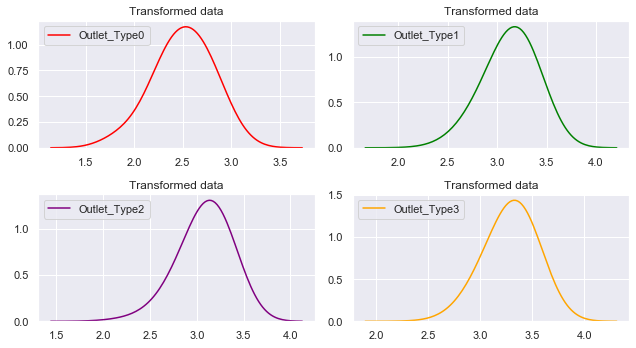

In [82]:
selected_df['transformed_sales'] = np.log(stats.boxcox(selected_df['Item_Outlet_Sales'].values)[0])

fig=plt.figure(figsize=(9,5))
n_rows = 2
n_cols = 2
color_lst = ['red', 'green', 'purple', 'orange']

for i in selected_df['Outlet_Type'].unique():
    ax=fig.add_subplot(n_rows,n_cols,i+1) 
    sns.kdeplot(selected_df.loc[selected_df['Outlet_Type']==i]['transformed_sales'], 
                bw=0.2, label="Outlet_Type"+str(i), color=color_lst[i])
    plt.title('Transformed data')
fig.tight_layout()
plt.show()